<a href="https://colab.research.google.com/github/NovrianPratama/MachineLearning/blob/dicoding/Machine_Learning_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latihan dasar machine learning by Dicoding


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_dt = pd.read_csv('/content/train.csv')
train_dt.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_dt.shape

(1460, 81)

In [4]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Menampilkan statistik deskriptif dari dataset
train_dt.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [6]:
# Memeriksa jumlah nilai yang hilang di setiap kolom
missing_value = train_dt.isnull().sum()
missing_value[missing_value>0] # menampilkan missing value yang lebih dari 0

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


Memisahkan missing value yang lebih dari 75% dari total dataset dan memisahkan yang kurang dari 75%

In [7]:
less = missing_value[missing_value < 1000].index
more = missing_value[missing_value >= 1000].index

Mengganti value numerical dan kategorical yang kosong dengan statistical

In [8]:
numerical_feature = train_dt[less].select_dtypes(include=['number']).columns
train_dt[numerical_feature] = train_dt[numerical_feature].fillna(train_dt[numerical_feature].median)

In [9]:
kategorical_feature = train_dt[less].select_dtypes(include=['object']).columns
for column in kategorical_feature:
  train_dt[column] = train_dt[column].fillna(train_dt[column].mode()[0])

Menghapus kolom yang memiliki banyak missing value

In [10]:
df = train_dt.drop(columns=more)

In [11]:
df.shape

(1460, 77)

In [12]:
# cek lagi total missing value
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0


In [13]:
print(df[numerical_feature].dtypes)


Id                int64
MSSubClass        int64
LotFrontage      object
LotArea           int64
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
MasVnrArea       object
BsmtFinSF1        int64
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
1stFlrSF          int64
2ndFlrSF          int64
LowQualFinSF      int64
GrLivArea         int64
BsmtFullBath      int64
BsmtHalfBath      int64
FullBath          int64
HalfBath          int64
BedroomAbvGr      int64
KitchenAbvGr      int64
TotRmsAbvGrd      int64
Fireplaces        int64
GarageYrBlt      object
GarageCars        int64
GarageArea        int64
WoodDeckSF        int64
OpenPorchSF       int64
EnclosedPorch     int64
3SsnPorch         int64
ScreenPorch       int64
PoolArea          int64
MiscVal           int64
MoSold            int64
YrSold            int64
SalePrice         int64
dtype: object


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   Utilities      1460 non-null   object
 9   LotConfig      1460 non-null   object
 10  LandSlope      1460 non-null   object
 11  Neighborhood   1460 non-null   object
 12  Condition1     1460 non-null   object
 13  Condition2     1460 non-null   object
 14  BldgType       1460 non-null   object
 15  HouseStyle     1460 non-null   object
 16  OverallQual    1460 non-null   int64 
 17  OverallCond    1460 non-null   int64 
 18  YearBuilt      1460 non-null

In [15]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,<bound method DataFrame.median of Id ...,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [16]:
for feature in numerical_feature:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')


In [17]:
df[numerical_feature] = df[numerical_feature].fillna(df[numerical_feature].median())


In [18]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0


In [19]:
df.shape

(1460, 77)

In [20]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


# Cek Outlier dari dataset

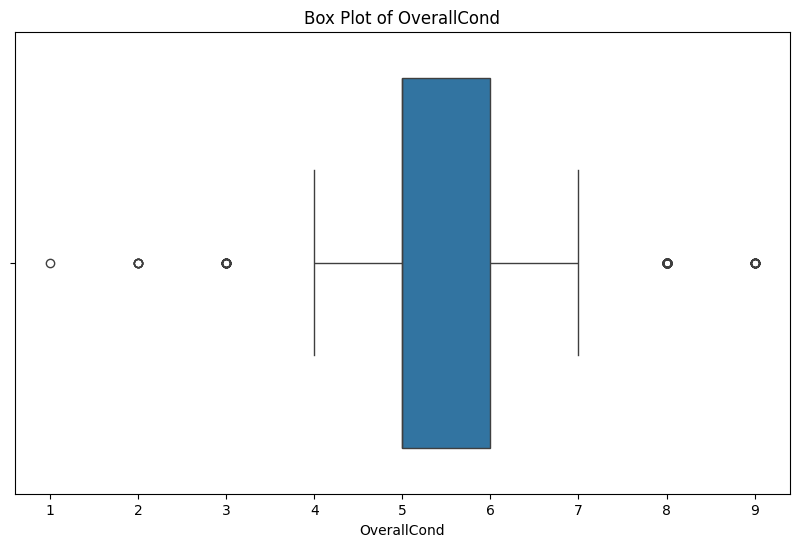

In [21]:
# for feature in numerical_feature:
#   plt.figure(figsize=(10,6))
#   sns.boxplot(x=df[feature])
#   plt.title(f"Box Plot of {feature}")
#   plt.show()

# Menampilkan semua yang ada di feature
# for feature in numerical_feature:
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x=df[feature])
#     plt.title(f"Box Plot of {feature}")
#     plt.show()

# menampilkan hanya satu bagian feature
# Memastikan fitur bernama 'OverallCond' ada dalam dataset
if 'OverallCond' in numerical_feature:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['OverallCond'])
    plt.title("Box Plot of OverallCond")
    plt.show()
else:
    print("'OverallCond' tidak ditemukan dalam fitur numerik.")


## Menghapus Data Outlier
Berikut adalah langkah-langkah umum untuk mendeteksi dan menangani outlier menggunakan metode IQR.

1. Menghitung IQR, Q1, dan Q3

- Q1 (Quartile 1): Nilai di persentil ke-25 data.

- Q3 (Quartile 3): Nilai di persentil ke-75 data.

- IQR: Rentang antara Q3 dan Q1 (IQR = Q3 - Q1).

2. Menentukan Batas Bawah dan Batas Atas

- Batas Bawah: Q1 - 1.5 * IQR

- Batas Atas: Q3 + 1.5 * IQR



In [22]:
# Contoh sederhana untuk mengidentifikasi outliers menggunakan IQR
Q1 = df[numerical_feature].quantile(0.25)
Q3 = df[numerical_feature].quantile(0.75)
IQR = Q3 - Q1

In [23]:
# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((df[numerical_feature] < (Q1 - 1.5 * IQR)) | (df[numerical_feature] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered = df.loc[condition, numerical_feature]

# Menggabungkan kembali dengan kolom kategorikal
kategorical_feature = df.select_dtypes(include=['object']).columns
df = pd.concat([df_filtered, df.loc[condition, kategorical_feature]], axis=1)

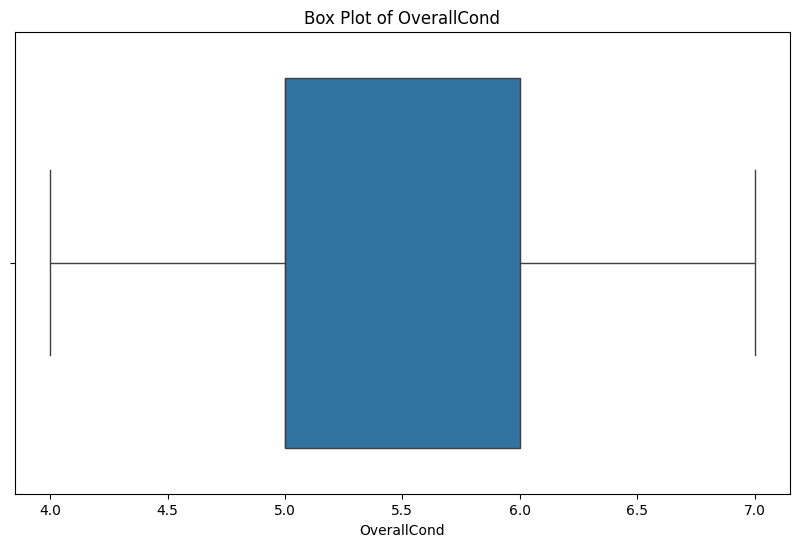

In [24]:
# menampilkan visualisasi outlier yang telah di hapus
if 'OverallCond' in numerical_feature:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['OverallCond'])
    plt.title("Box Plot of OverallCond")
    plt.show()
else:
    print("'OverallCond' tidak ditemukan dalam fitur numerik.")

## Normalisasi dan Standardisasi Data
Perbedaan keduanya:
- Normalisasi: mengubah data ke dalam rentang [0, 1]. Ideal untuk model berbasis jarak dan data yang tidak terdistribusi normal.
- Standardisasi: mengubah data sehingga rata-rata menjadi atau mendekati 0 dan standar deviasi menjadi 1. Hal ini membantu model yang memerlukan distribusi normal atau data dengan skala berbeda menjadi lebih ideal pada proses pelatihannya.

In [25]:
from sklearn.preprocessing import StandardScaler

# Standardisasi fitur numerik
scaler = StandardScaler()
df[numerical_feature] = scaler.fit_transform(df[numerical_feature])

Text(0.5, 1.0, 'Histogram Sebelum Standardisasi')

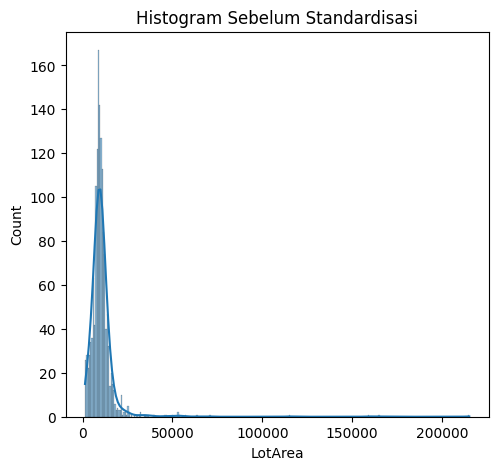

In [26]:
# Histogram Sebelum Standardisasi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train_dt[numerical_feature[3]], kde=True)
plt.title("Histogram Sebelum Standardisasi")

Text(0.5, 1.0, 'Histogram Setelah Standardisasi')

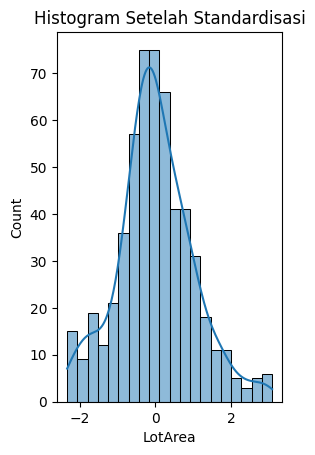

In [27]:
# Histogram Setelah Standardisasi
plt.subplot(1, 2, 2)
sns.histplot(df[numerical_feature[3]], kde=True)
plt.title("Histogram Setelah Standardisasi")

## Menangani Duplikasi
menggunakan fungsi : duplicated() untuk menangani duplikasi

In [28]:
duplicates = df.duplicated()
print("Jumlah duplikat")
print(df[duplicates])

# hasil nya menunjukkan tidak ada data duplikacate

Jumlah duplikat
Empty DataFrame
Columns: [Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice, MSZoning, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, SaleType, SaleCondition]
Index: []

[0 rows x 77 columns]


Cara menangani data duplikate yaitu dengan fungsi drop_duplicates()

In [29]:
# karena pada codinga diatas tidak memiliki duplicate maka kita contohkan sja
df = df.drop_duplicates()

print("Jumlah duplikat setelah dihapus")
print(df[duplicates])

Jumlah duplikat setelah dihapus
Empty DataFrame
Columns: [Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice, MSZoning, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, SaleType, SaleCondition]
Index: []

[0 rows x 77 columns]


## Mengonversi Tipe Data
untuk pemodelan dibutuhkan data bertipe numeric, untuk data bertipe kategorical seperti merah, biru, dan hijau. itu dapat diubah menjadi 0, 1, dan 2
tiap angka tersebut melambangkan kategori.

3 cara untuk mengonversi tipe data
1. One-Hot Encoding: mengubah setiap kategori menjadi kolom biner terpisah dengan nilai 0 atau 1 (bisa juga True atau False).
2. Label Encoding: memberikan label numerik untuk setiap kategori, meskipun ini hanya cocok untuk data kategorikal ordinal.
3. Ordinal Encoding: mengonversi kategori yang memiliki urutan menjadi nilai numerik yang mencerminkan urutan tersebut.

In [30]:
# membuat variabel baru yang berisi data kategorical
category_features = df.select_dtypes(include=['object']).columns
df[category_features]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
10,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,...,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,...,TA,Min2,Gd,Detchd,Unf,Fa,TA,Y,WD,Normal
1451,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Ex,Typ,Gd,Attchd,Fin,TA,TA,Y,New,Partial
1453,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Abnorml
1454,FV,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal


In [31]:
df[category_features].shape

(557, 39)

In [32]:
# Kita akan menggunakan metode one hot encoding dan label encoding karena
#data kategorikal yang ada pada dataset ini tidak memiliki urutan
df_one_hot = pd.get_dummies(df, columns=category_features)
df_one_hot

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.768952,0.356986,-0.265012,-0.284244,0.614520,-0.523677,0.784193,0.704506,1.183911,0.639427,...,False,False,False,False,True,False,False,False,True,False
2,-1.764179,0.356986,-0.037099,0.744924,0.614520,-0.523677,0.704296,0.653431,0.856804,0.101006,...,False,False,False,False,True,False,False,False,True,False
4,-1.759405,0.356986,1.178437,1.851281,1.419903,-0.523677,0.664347,0.551281,2.665515,0.514611,...,False,False,False,False,True,False,False,False,True,False
6,-1.754632,-0.917637,0.494698,0.316349,1.419903,-0.523677,0.824141,0.806656,1.087703,2.262035,...,False,False,False,False,True,False,False,False,True,False
10,-1.745085,-0.917637,0.114843,0.726546,-0.996245,-0.523677,-0.733845,-1.236347,-0.701766,1.128902,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1.687057,0.038330,0.114843,0.934953,-1.801628,2.308244,-2.931004,0.551281,-0.701766,-1.088417,...,False,False,False,False,True,False,False,False,True,False
1451,1.694217,-0.917637,0.722611,0.014215,1.419903,-0.523677,0.983934,1.010957,1.164670,-1.088417,...,False,False,True,False,False,False,False,False,False,True
1453,1.698991,-0.917637,1.634263,2.938156,-0.996245,-0.523677,0.904038,0.857731,-0.701766,-1.088417,...,False,False,False,False,True,True,False,False,False,False
1454,1.701378,-0.917637,-0.492925,-0.633426,0.614520,-0.523677,0.824141,0.806656,-0.701766,-0.084995,...,False,False,False,False,True,False,False,False,True,False


In [33]:
df_one_hot.shape

# hasil setelah one hot encoding menghasilkan penambahan kolom

(557, 216)

Cara kedua menggunakan Label Encoding

In [34]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
df_lencoder = pd.DataFrame(df)

for col in category_features:
    df_lencoder[col] = label_encoder.fit_transform(df[col])

# Menampilkan hasil
df_lencoder

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-1.768952,0.356986,-0.265012,-0.284244,0.614520,-0.523677,0.784193,0.704506,1.183911,0.639427,...,2,4,2,0,1,2,3,2,8,3
2,-1.764179,0.356986,-0.037099,0.744924,0.614520,-0.523677,0.704296,0.653431,0.856804,0.101006,...,2,4,4,0,1,2,3,2,8,3
4,-1.759405,0.356986,1.178437,1.851281,1.419903,-0.523677,0.664347,0.551281,2.665515,0.514611,...,2,4,4,0,1,2,3,2,8,3
6,-1.754632,-0.917637,0.494698,0.316349,1.419903,-0.523677,0.824141,0.806656,1.087703,2.262035,...,2,4,2,0,1,2,3,2,8,3
10,-1.745085,-0.917637,0.114843,0.726546,-0.996245,-0.523677,-0.733845,-1.236347,-0.701766,1.128902,...,3,4,2,3,2,2,3,2,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1.687057,0.038330,0.114843,0.934953,-1.801628,2.308244,-2.931004,0.551281,-0.701766,-1.088417,...,3,3,2,3,2,0,3,2,8,3
1451,1.694217,-0.917637,0.722611,0.014215,1.419903,-0.523677,0.983934,1.010957,1.164670,-1.088417,...,0,4,2,0,0,2,3,2,6,4
1453,1.698991,-0.917637,1.634263,2.938156,-0.996245,-0.523677,0.904038,0.857731,-0.701766,-1.088417,...,3,4,2,0,2,2,3,2,8,0
1454,1.701378,-0.917637,-0.492925,-0.633426,0.614520,-0.523677,0.824141,0.806656,-0.701766,-0.084995,...,2,4,2,0,1,2,3,2,8,3


## Exploratory dan Explanatory Data Analysis

In [35]:
df_lencoder.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-1.768952,0.356986,-0.265012,-0.284244,0.614520,-0.523677,0.784193,0.704506,1.183911,0.639427,...,2,4,2,0,1,2,3,2,8,3
2,-1.764179,0.356986,-0.037099,0.744924,0.614520,-0.523677,0.704296,0.653431,0.856804,0.101006,...,2,4,4,0,1,2,3,2,8,3
4,-1.759405,0.356986,1.178437,1.851281,1.419903,-0.523677,0.664347,0.551281,2.665515,0.514611,...,2,4,4,0,1,2,3,2,8,3
6,-1.754632,-0.917637,0.494698,0.316349,1.419903,-0.523677,0.824141,0.806656,1.087703,2.262035,...,2,4,2,0,1,2,3,2,8,3
10,-1.745085,-0.917637,0.114843,0.726546,-0.996245,-0.523677,-0.733845,-1.236347,-0.701766,1.128902,...,3,4,2,3,2,2,3,2,8,3


In [36]:
# Membuat variabel baru yang menyimpan missing value dan persentage
missing_value = df_lencoder.isnull().sum()
missing_persentage = (missing_value / len(df_lencoder)) * 100

In [37]:
# membuat variabel untuk missing data
missing_data = pd.DataFrame({
    'Missing Value': missing_value,
    'Persentage': missing_persentage
}).sort_values(by='Missing Value', ascending=False)

# Menampilkan kolom dengan missing values
missing_data[missing_data['Missing Value'] > 0]

,Missing Value,Persentage


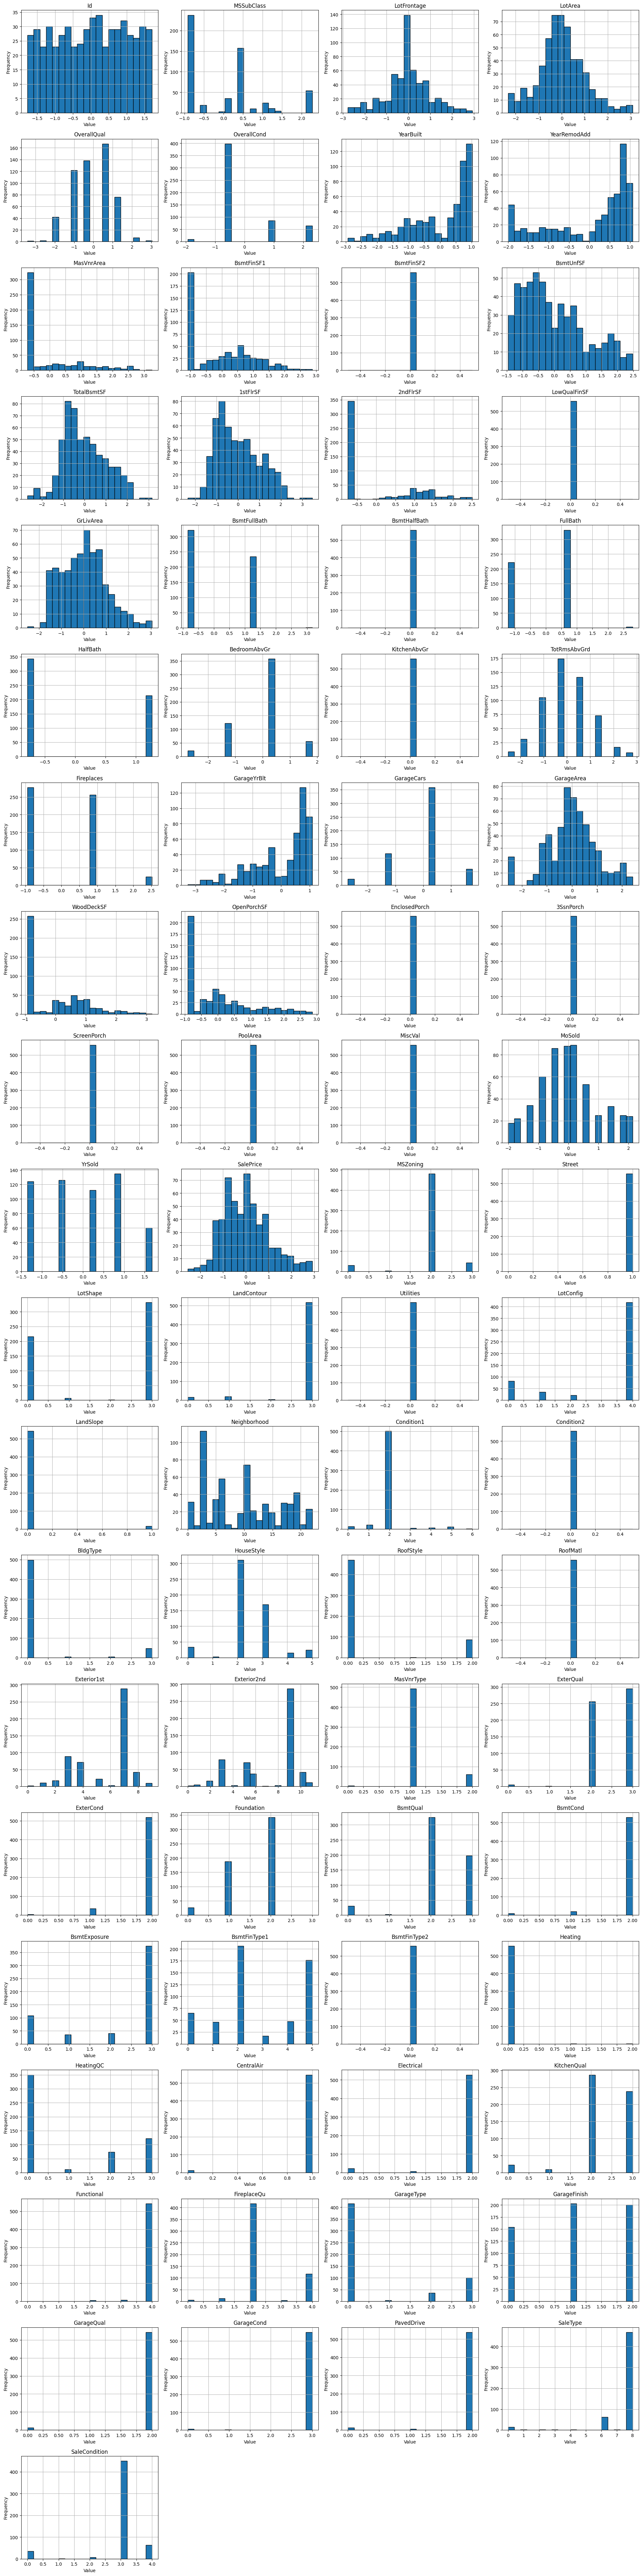

In [38]:
# Menghitung jumlah variabel
num_var = df_lencoder.shape[1]

# menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4 # jumlah kolom yang diinginkan
r_rows = -(-num_var // n_cols) # Ceiling Divison untuk menentukkan jumlah baris

# membuat subplot
fig, axes = plt.subplots(r_rows, n_cols, figsize=(20, r_rows * 4))

# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# plot setiap variabel
for i, column in enumerate(df_lencoder.columns):
  df_lencoder[column].hist(ax=axes[i], bins=20, edgecolor='black')
  axes[i].set_title(column)
  axes[i].set_xlabel('Value')
  axes[i].set_ylabel('Frequency')

# Menghapus subplot yang tidak terpaki (jika ada)
for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])

# menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

Visualisasikan distribusi beberapa kolom serta melihat korelasi antara variabel numerik.

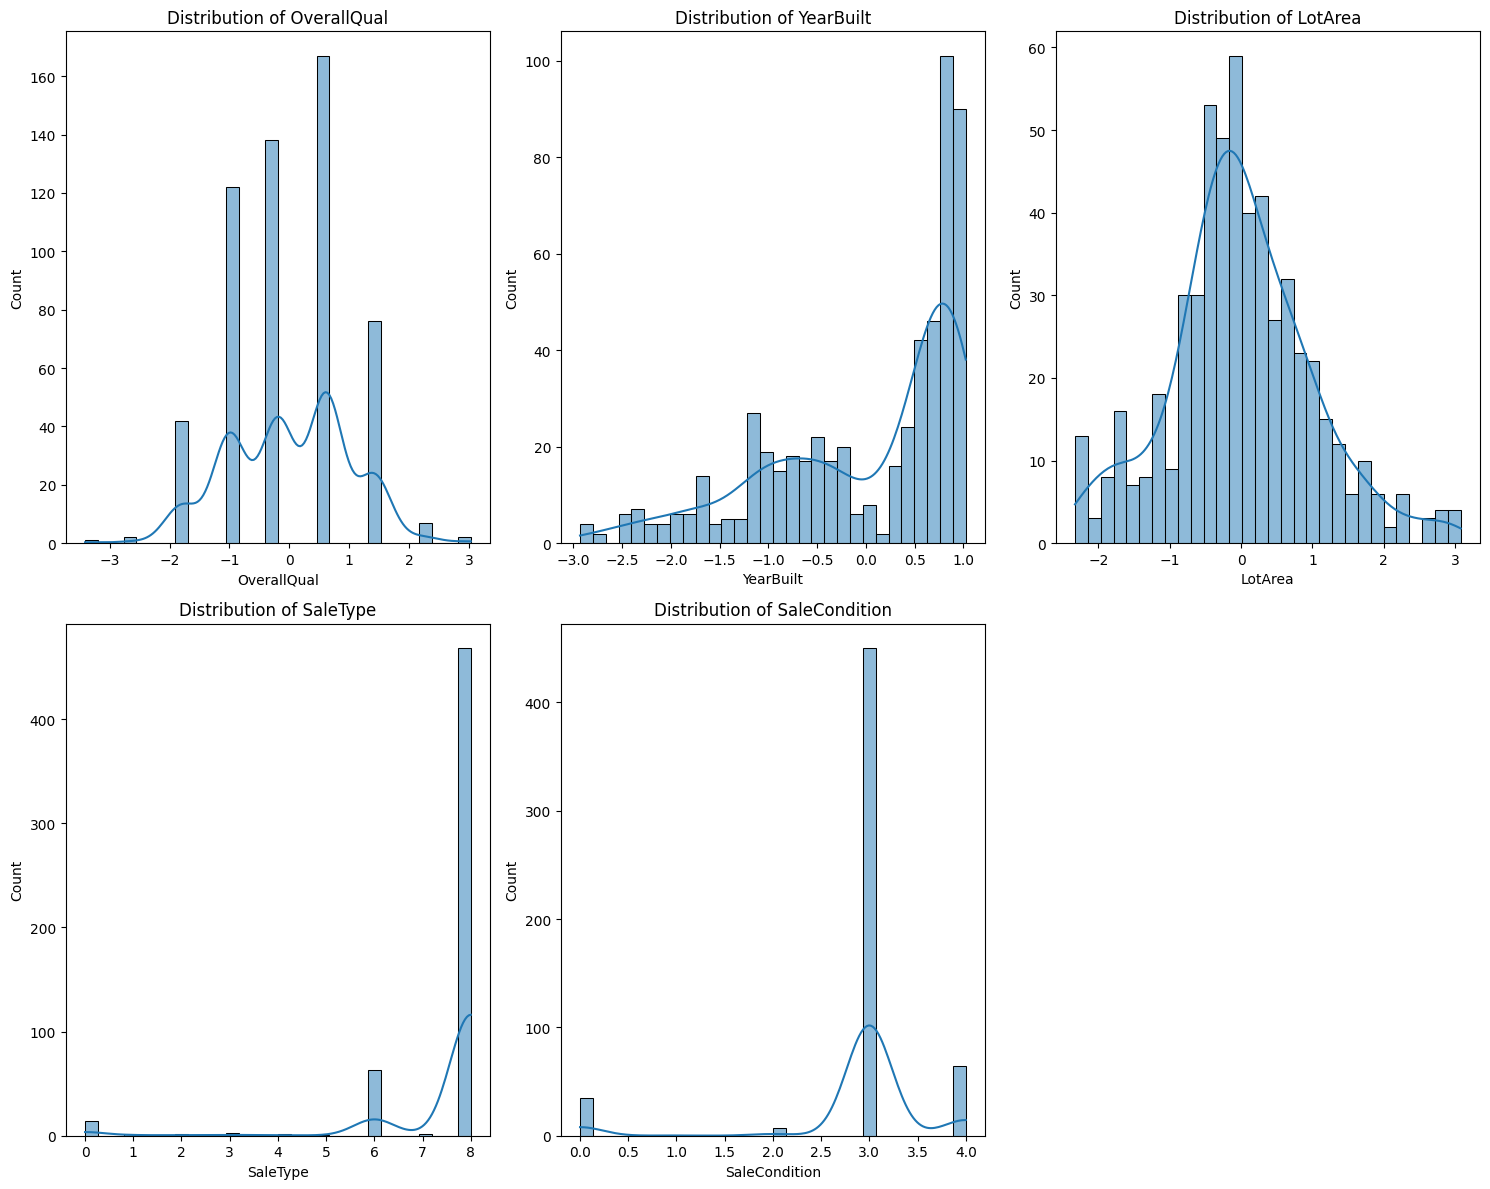

In [39]:
# visualisasi distribusi data untuk beberapa kolom
columns_to_plot = ['OverallQual', 'YearBuilt', 'LotArea', 'SaleType', 'SaleCondition']

plt.figure(figsize=(15,12))
for i, column in enumerate(columns_to_plot, 1):
  plt.subplot(2, 3, i)
  sns.histplot(df_lencoder[column], kde=True, bins=30)
  plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

Informasi:
- OverallQual: sebagian besar data terkonsentrasi di sekitar nilai
tengah dengan distribusi miring ke kanan.
- YearBuilt: distribusi cenderung normal dengan beberapa lonjakan pada tahun tertentu, menunjukkan periode pembangunan rumah yang lebih aktif.
- LotArea: distribusinya tidak simetris karena adanya beberapa outlier yang signifikan pada sisi kanan (lot area yang sangat besar).
- SaleType: kategori tertentu mendominasi distribusi, menunjukkan preferensi atau pola tertentu dalam tipe penjualan.
- SaleCondition: mirip dengan SaleType, beberapa kondisi penjualan lebih umum dibandingkan lainnya.

## Matrix Korelasi

Matriks korelasi menunjukkan beberapa hubungan penting antara variabel-variabel yang ada dalam dataset. Biasanya warna yang lebih terang atau lebih gelap mengindikasikan korelasi yang lebih kuat (positif atau negatif)

In [40]:
print(df_lencoder)

            Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0    -1.768952    0.356986    -0.265012 -0.284244     0.614520    -0.523677   
2    -1.764179    0.356986    -0.037099  0.744924     0.614520    -0.523677   
4    -1.759405    0.356986     1.178437  1.851281     1.419903    -0.523677   
6    -1.754632   -0.917637     0.494698  0.316349     1.419903    -0.523677   
10   -1.745085   -0.917637     0.114843  0.726546    -0.996245    -0.523677   
...        ...         ...          ...       ...          ...          ...   
1448  1.687057    0.038330     0.114843  0.934953    -1.801628     2.308244   
1451  1.694217   -0.917637     0.722611  0.014215     1.419903    -0.523677   
1453  1.698991   -0.917637     1.634263  2.938156    -0.996245    -0.523677   
1454  1.701378   -0.917637    -0.492925 -0.633426     0.614520    -0.523677   
1455  1.703764    0.356986    -0.492925 -0.480154    -0.190863    -0.523677   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinS

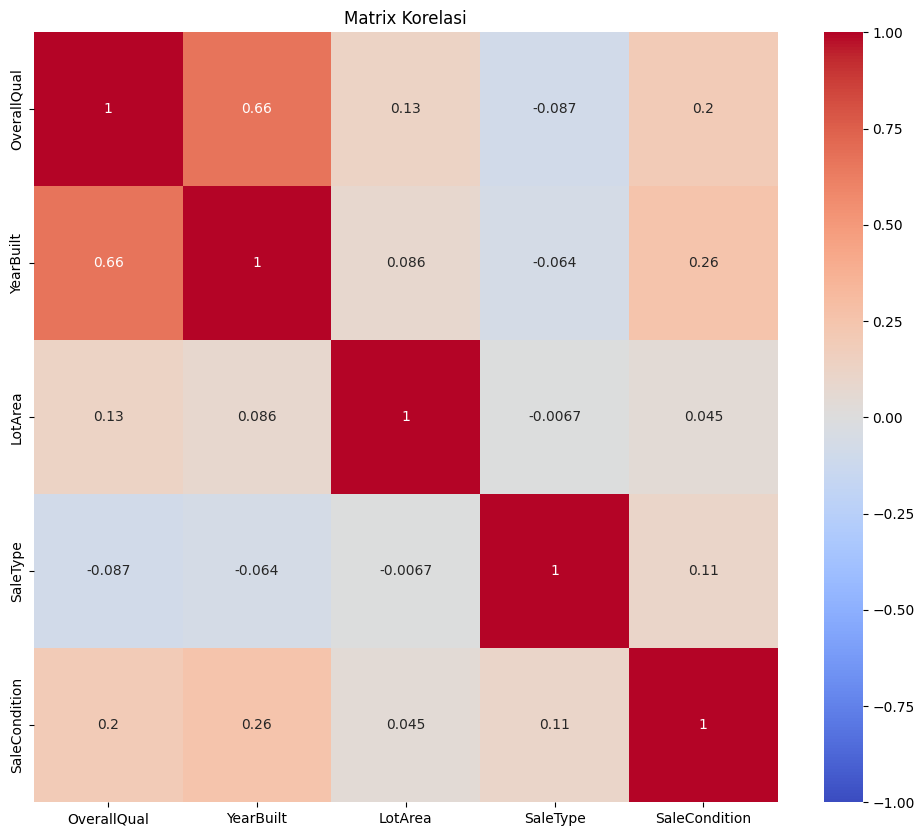

In [41]:
# Visualisasi korelasi antar variabel numeric

# masukkan nama kolom yg ingin dibuat dalam variabel baru
column_corr = ['OverallQual', 'YearBuilt', 'LotArea', 'SaleType', 'SaleCondition']

# buat variabel bar untuk menyimpan data kolom
df_corr = df_lencoder[column_corr]

#
plt.figure(figsize=(12, 10))
corr_matrix = df_corr.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrix Korelasi')
plt.show()

Informasi:
- Korelasi positif dan terbaiki terdapat pada kolom OverallQual dan YearBuilt
- Korelasi negatif atau rendah juga terlihat pada beberapa pasangan variabel, menunjukkan hubungan yang lemah atau tidak ada antara variabel tersebut.

catatan sebagai berikut.
- Korelasi Positif: nilai korelasi positif menunjukkan bahwa saat satu variabel meningkat, variabel lain juga cenderung meningkat. Nilai korelasi +1 menunjukkan korelasi positif sempurna.
- Korelasi Negatif: nilai korelasi negatif menunjukkan bahwa saat satu variabel meningkat, variabel lain cenderung menurun. Nilai korelasi -1 menunjukkan korelasi negatif sempurna.
- Korelasi Nol: nilai korelasi 0 menunjukkan bahwa tidak ada hubungan linier antara dua variabel.

## **Matrix Korelasi Untuk Fitur atau Target**

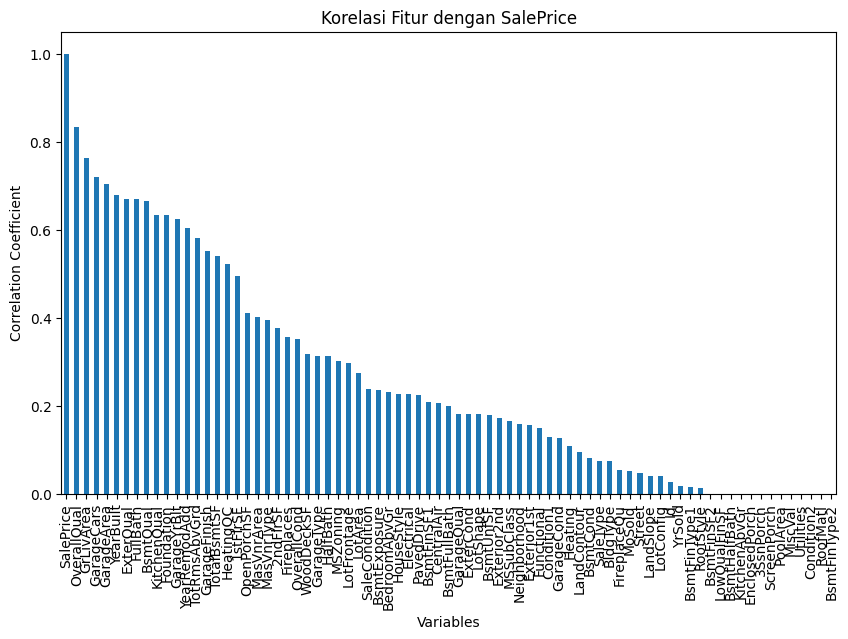

In [42]:
# menyimpan data kolom target dalam variabel baru
target = df_lencoder.corr()['SalePrice']

# (Opsional) Mengurutkan hasil korelasi berdasarkan korelasi
target_corr_sorted = target.abs().sort_values(ascending=False)

plt.figure(figsize=(10,6))
target_corr_sorted.plot(kind='bar')
plt.title('Korelasi Fitur dengan SalePrice')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

# **Beberapa kesimpulan berikut.**

- Hubungan Luas Ruang Tinggal dan Harga Jual: Terdapat hubungan positif yang signifikan antara luas ruang tinggal dan harga jual, dimana properti yang lebih luas biasanya dijual dengan harga yang lebih tinggi.

- Dampak Luas Garasi: Ada korelasi moderat antara luas garasi dan harga jual, menunjukkan bahwa garasi yang lebih luas bisa meningkatkan harga jual properti.

- Outliers dan Distribusi: Outliers pada variabel seperti harga jual dan luas ruang tinggal bisa memberi insight unik tapi juga bisa menyesatkan. Transformasi log membantu membuat distribusi data lebih normal dan mudah dianalisis.

- Pengaruh Ukuran Properti: Ukuran ruang tinggal dan garasi merupakan faktor penting yang mempengaruhi nilai jual, sehingga harus dipertimbangkan oleh pengembang atau investor properti.

- Pengelolaan Outliers: Penting untuk menganalisis lebih lanjut outliers untuk menentukan apakah mereka mewakili kondisi pasar yang spesifik atau merupakan kesalahan data.

# Data Splitting

Teknik splitting dataset:
1. **Holdout Method: **Metode dasar yang membaginya menjadi dua atau tiga bagian: training set, validation set, dan test set. Ini adalah metode yang paling sederhana dan umum digunakan.
2. **K-Fold Cross Validation:** teknik yang membagi dataset menjadi k subset (folds).
3. **Stratified Splitting: **teknik splitting akan membagi data sedemikian rupa sehingga proporsi kelas dalam training, validation, dan test set tetap sama seperti di dataset asli. Ini sangat penting jika kondisi dataset tidak seimbang.
4. **Time Series Splitting:** Untuk data time series, data harus dibagi berdasarkan waktu. Data yang lebih baru digunakan untuk pengujian, sementara data yang lebih lama digunakan untuk pelatihan.



berikut untuk menghasilkan pembagian yang optimal:
- Imbalance Data: jika dataset memiliki distribusi kelas yang tidak seimbang, teknik seperti stratified splitting sangat penting untuk memastikan bahwa model tidak bias terhadap kelas mayoritas.
- Data Leakage: data leakage terjadi ketika informasi dari luar set pelatihan "bocor" ke dalam proses pelatihan sehingga kinerja model di test set tampak lebih baik daripada yang sebenarnya. Splitting yang benar membantu menghindari masalah ini.
- Randomness: randomness dalam proses splitting penting untuk memastikan bahwa pembagian data tidak bias.

Melakukan splitting dataset dulu baru preprocessing jika:
- Standardisasi/Normalisasi: proses seperti standardisasi (mengubah data agar memiliki mean 0 dan standar deviasi 1) atau normalisasi
- Feature Engineering: teknik seperti pembuatan fitur baru atau transformasi fitur (misalnya, log transform, polynomial features)
- Scaling dan PCA: teknik seperti scaling atau Principal Component Analysis (PCA) yang mengubah skala atau struktur data

In [43]:
# proses splitting data
import sklearn

# memisahkan fitur X dan target Y
X = df_lencoder.drop(columns=['SalePrice'])
y = df_lencoder['SalePrice']

In [44]:
# membagi dataset dengan teknik holdout
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [45]:
# menghitung jumlah data training
print(f"Jumlah data training: {len(X)}")

# Menghitung jumlah data x_train
print(f"Jumlah data x train: {len(x_train)}")

# Menghitung jumlah data x test
print(f"Jumlah data x test: {len(x_test)}")

Jumlah data training: 557
Jumlah data x train: 445
Jumlah data x test: 112


# Modelling

In [46]:
# membuat model regresi

# Melatih model 1 dengan algoritma least Anggle Regression
from sklearn import linear_model
lars = linear_model.Lars(n_nonzero_coefs=1).fit(x_train, y_train)

# Melatih model 2 dengan algoritma Linear Regression
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(x_train, y_train)

# Melatih model 3 dengan algoritma Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(random_state=184).fit(x_train, y_train)

Metrik umum untuk evaluasi adalah accuracy, precision, recall, F1-score (untuk klasifikasi), dan Mean Squared Error (MSE) atau R-squared (untuk regresi).

### Evaluasi untuk algoritma Least Anggle Regression

In [51]:
# imoprt fungsi metrix regresi
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# membuat evaluasi pada model 1 yaitu Lars
pred_lars = lars.predict(x_test)
mae_lars = mean_absolute_error(y_test, pred_lars)
mse_lars = mean_squared_error(y_test, pred_lars)
r2_lars = r2_score(y_test, pred_lars)

# membuat dict untuk menyimpan hasil evaluasi
data = {
    'MAE' : [mae_lars],
    'MSE' : [mse_lars],
    'R2' : [r2_lars]
}

# # konversi dictionary menjadi dataframe
df_result = pd.DataFrame(data, index=['lars'])
df_result

,MAE,MSE,R2
lars,0.783959,0.924356,-0.018183


### Evaluasi Algoritma Linear Regression

In [54]:
# membuat evaluasi pada model
pred_lr = LR.predict(x_test)
mae_lr = mean_absolute_error(y_test, pred_lr)
mse_lr = mean_squared_error(y_test, pred_lr)
r2_lr = r2_score(y_test, pred_lr)

# menggabungkan hasil evaluasi pada dataframe
df_result.loc['Linear Regression'] = [mae_lr, mse_lr, r2_lr]
df_result

,MAE,MSE,R2
lars,0.783959,0.924356,-0.018183
Linear Regression,0.223203,0.085886,0.905396


### Evaluasi Algoritma Gradient Boosting Regressor

In [56]:
# membuat model evaluasi
pred_gbr = GBR.predict(x_test)
mae_gbr = mean_absolute_error(y_test, pred_gbr)
mse_gbr = mean_squared_error(y_test, pred_gbr)
r2_gbr = r2_score(y_test, pred_gbr)

# menggabungkan hasil evaluasi pada dataframe
df_result.loc['Gradient Boosting Regressor'] = [mae_gbr, mse_gbr, r2_gbr]
df_result

,MAE,MSE,R2
lars,0.783959,0.924356,-0.018183
Linear Regression,0.223203,0.085886,0.905396
Gradient Boosting Regressor,0.185230,0.062079,0.931619


Kesimpulan dari evaluasi ketiga algoritma:
Dari hasil evaluasi ini dapat disimpulkan:

- Gradient Boosting Regressor menunjukkan performa terbaik dengan MAE dan MSE terendah (0.185 dan 0.062) serta R² tertinggi (0.931). Ini menandakan model ini paling akurat dalam prediksinya.
- Linear Regression menunjukkan performa yang juga cukup baik dengan R² 0.905, meski tidak sebaik Gradient Boosting.
- LARS memiliki performa yang paling buruk dengan R² negatif (-0.018), yang menandakan model ini bahkan lebih buruk daripada menggunakan rata-rata sederhana sebagai prediksi.

### Fungsi dari tiap2 metrix evaluasi:
- predict(): fungsi .predict() pada scikit-learn digunakan untuk membuat prediksi berdasarkan model yang telah dilatih. Setelah Anda melatih model dengan data pelatihan (menggunakan .fit() pada materi sebelumnya), Anda dapat menggunakan .predict() untuk menghasilkan nilai prediksi pada data baru atau data testing.

- mean_absolute_error: MAE mengukur rata-rata dari kesalahan absolut antara nilai prediksi dan nilai aktual. Ini adalah ukuran yang intuitif karena langsung menghitung seberapa jauh prediksi dari nilai sebenarnya tanpa memperhitungkan arah (positif atau negatif).

- mean_squared_error: MSE mengukur rata-rata dari kuadrat kesalahan antara nilai prediksi dan nilai aktual. Karena kesalahan dikuadratkan, MSE memberikan penalti (nilai error) yang lebih besar untuk kesalahan yang lebih besar, membuatnya lebih sensitif terhadap outlier.

- r2_score: R² adalah metrik statistik yang menunjukkan seberapa baik nilai prediksi mendekati nilai aktual. R² mengukur proporsi varians dari target yang dapat dijelaskan oleh fitur dalam model.

### Menyimpan Model
Untuk menyimpan model yang telah dilatih, dapat menggunakan
1. modul joblib:
Joblib adalah pilihan yang disarankan untuk menyimpan model scikit-learn karena lebih efisien dalam menyimpan objek model yang besar.

2. pickle: Pickle adalah modul standar Python yang dapat digunakan untuk menyimpan hampir semua objek Python termasuk model machine learning.

untuk menyimpan model scikit-learn, joblib sering kali merupakan pilihan yang lebih baik.

In [57]:
# Menyimpan hasil evaluasi dengan modul Joblib

import joblib

# Menyimpan model kedalam file
joblib.dump(GBR, 'gbr_model.joblib')

['gbr_model.joblib']

In [58]:
# Menyimpan hasil evaluasi dengan modeul pickle
import pickle

# Menyimpan model ke dalam file
with open('gbr_model.pkl', 'wb') as file:
    pickle.dump(GBR, file)

# Deployment and Monitoring

In [60]:
# menginstal Flask
from flask import Flask, request, jsonify
import joblib

# instal aplikasi flask
app = Flask(__name__)

# memuat model dari file joblib
joblib_model = joblib.load('gbr_model.joblib')

@app.route('/predict', methods=['POST'])
def predict():
  data = request.json['data']
  prediction = joblib_model.predict(data)
  return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
  app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


Setelah menyelesaikan langkah diatas selanjutny mencoba pada dilokal
buat data json, ile json yang menampung seluruh variabel/fitur untuk memprediksi rumah dengan nama data.json.
- Tahapan terakhir untuk memastikan API Anda berjalan sedemikian rupa adalah melakukan pemeriksaan. Mari kita lakukan salah satu percobaan menggunakan curl tanpa menggunakan postman. Yang perlu Anda lakukan adalah membuka terminal dan memasukkan command berikut.

curl -X POST http://127.0.0.1:5000/predict -H "Content-Type: application/json" -d @data.json

Pastikan path atau direktori yang Anda buka pada terminal sudah sesuai dengan penyimpanan data.json